In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio
import librosa
import librosa.display
from scipy.io import wavio

In [44]:
air = 'air.wav'
dry='dry.wav'
water='water.wav'
n_train='train2.wav'
n_test='real_test.wav'



y1, sr1 = librosa.load(air)
y2, sr2 = librosa.load(dry)
y3, sr3 = librosa.load(water)
n_train, sr_train = librosa.load(n_train)
n_test, sr_test = librosa.load(n_test)

a = np.vstack((y1,y2,y3))
len(a[0])

229376

In [45]:
Audio(data=y1, rate=sr1)

In [33]:
Audio(data=y2, rate=sr2)

In [34]:
Audio(data=y3, rate=sr3)

In [35]:
Audio(data=n_train, rate=sr_train)

In [36]:
theta_opt = np.linalg.lstsq(a.T, -n_train, rcond=None)[0]

print(theta_opt)

[-0.67933303 -0.49225092 -0.6813322 ]


[ 0.0007636  -0.00093746  0.00100234 ...  0.00952148 -0.01504517
  0.02816772]
[ 0.00054932 -0.00073242  0.00125122 ...  0.00952148 -0.01504517
  0.02816772]


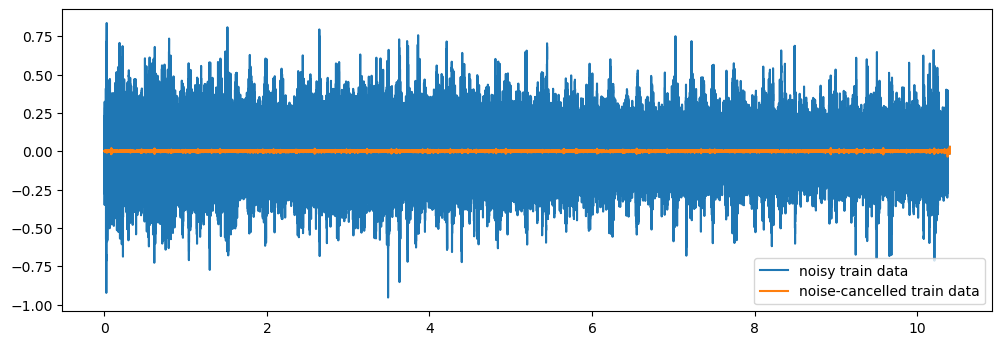

In [40]:
noise_cancelled_train = n_train + theta_opt.T@a
#noise_cancelled_train=n_train-n_train
print(noise_cancelled_train)
print(n_train)
plt.figure(figsize=(12,4), dpi=100)
plt.plot(np.arange(len(n_train))/sr_train, n_train, label="noisy train data")
plt.plot(np.arange(len(n_train))/sr_train, noise_cancelled_train, label="noise-cancelled train data")
plt.legend()
plt.show()
Audio(data=noise_cancelled_train, rate=sr3)

In [41]:
Audio(data=n_test, rate=sr_test)

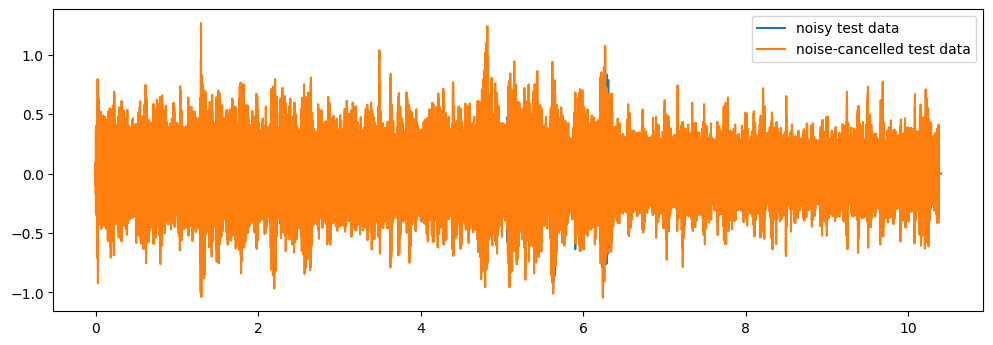

In [46]:
noise_cancelled_test = n_test + theta_opt.T@a
#noise_cancelled_test=n_test-n_train
plt.figure(figsize=(12,4), dpi=100)
plt.plot(np.arange(len(n_test))/sr_test, n_test, label="noisy test data")
plt.plot(np.arange(len(n_test))/sr_test, noise_cancelled_test, label="noise-cancelled test data")
plt.legend()
plt.show()

Audio(data=noise_cancelled_test, rate=sr_test)